# Data Understanding

Data Understanding adalah tahap awal dalam proses data mining atau analisis data, di mana kita mencoba mengenali, mengevaluasi, dan memahami data yang akan digunakan. Tujuan utamanya adalah untuk mendapatkan wawasan awal tentang struktur data, kualitas data, dan informasi yang dikandungnya, sebelum melangkah ke tahap pemrosesan dan analisis lebih lanjut.

Beberapa aktivitas dalam tahap Data Understanding:
Pengumpulan data (Data Collection): Mengambil data dari berbagai sumber, seperti database, file CSV, API, dsb.

Deskripsi data (Data Description): Menampilkan ringkasan statistik seperti jumlah data, tipe data, nilai maksimum, minimum, rata-rata, dsb.

Eksplorasi data (Data Exploration): Menggunakan teknik visualisasi (grafik, diagram, histogram) atau statistik untuk melihat pola, tren, dan anomali.

Verifikasi kualitas data (Data Quality Verification): Mengecek apakah ada data yang hilang, duplikat, atau tidak valid.

Contoh sederhana:
Kalau kamu punya dataset berisi data penjualan toko, di tahap data understanding kamu akan melihat:

Ada berapa data transaksi?

Apa saja atributnya? (misalnya: tanggal, jumlah barang, harga)

Apakah ada kolom yang banyak nilainya kosong?

Apakah semua nilai harga berbentuk angka?

In [19]:
!pip install matplotlib seaborn


In [2]:
from google.colab import files
uploaded = files.upload()


Saving cirrhosis.csv to cirrhosis.csv


In [3]:
import pandas as pd
df = pd.read_csv('cirrhosis.csv')

# Pemrosesan awal data

## Missing values

 Tabel Missing Values per Kolom:



,Total Missing,Persentase (%)
Tryglicerides,136,32.535885
Cholesterol,134,32.057416
Copper,108,25.837321
Drug,106,25.358852
Spiders,106,25.358852
Hepatomegaly,106,25.358852
Ascites,106,25.358852
Alk_Phos,106,25.358852
SGOT,106,25.358852
Platelets,11,2.631579


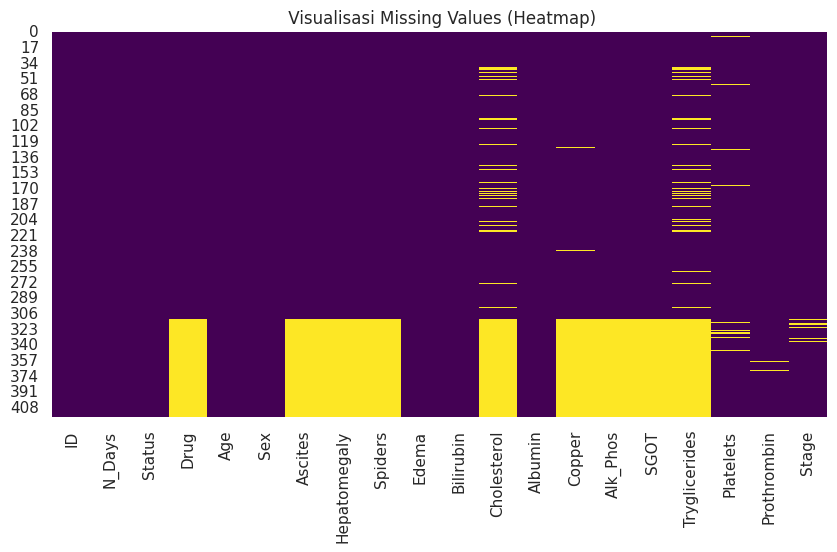

 Kolom diimputasi dengan mean: ['Platelets', 'Prothrombin', 'Stage']


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv('cirrhosis.csv')

# ========== 1. Cek Missing Values ==========
missing = df.isnull().sum()
missing_percent = (missing / df.shape[0]) * 100
missing_df = pd.DataFrame({
    'Total Missing': missing,
    'Persentase (%)': missing_percent
})
missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values(by='Persentase (%)', ascending=False)

print(" Tabel Missing Values per Kolom:\n")
display(missing_df.style.background_gradient(cmap='Oranges'))

# ========== 2. Visualisasi Missing ==========
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title(" Visualisasi Missing Values (Heatmap)")
plt.show()

# ========== 3. Tentukan strategi ==========
total_rows = df.shape[0]
low_missing = [col for col in missing.index if 0 < missing[col]/total_rows <= 0.05]
high_missing = [col for col in missing.index if missing[col]/total_rows > 0.3]
medium_missing = [col for col in missing.index if 0.05 < missing[col]/total_rows <= 0.3]

# ========== 4. Imputasi kolom missing < 5% ==========
if low_missing:
    imputer_mean = SimpleImputer(strategy='mean')
    df[low_missing] = imputer_mean.fit_transform(df[low_missing])
    print(f" Kolom diimputasi dengan mean: {low_missing}")

# ========== 5. Hapus kolom dengan missing > 30% ==========
if high_missing:
    df.drop(columns=high_missing, inplace=True)
    print(f" Kolom dibuang (terlalu banyak missing): {high_missing}")

# ========== 6. Hapus baris untuk missing sedang ==========
if medium_missing:
    before = df.shape[0]
    df = df.dropna(subset=medium_missing)
    after = df.shape[0]
    print(f" {before - after} baris dihapus karena missing di kolom: {medium_missing}")

# ========== 7. Tampilkan hasil akhir ==========
print("\n Penanganan missing values selesai.")
print(f" Total data setelah pembersihan: {df.shape[0]} baris, {df.shape[1]} kolom")
print("🧼 Missing values tersisa:", df.isnull().sum().sum())


## Encode Variabel Kategorikal

Data awal:
   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0    

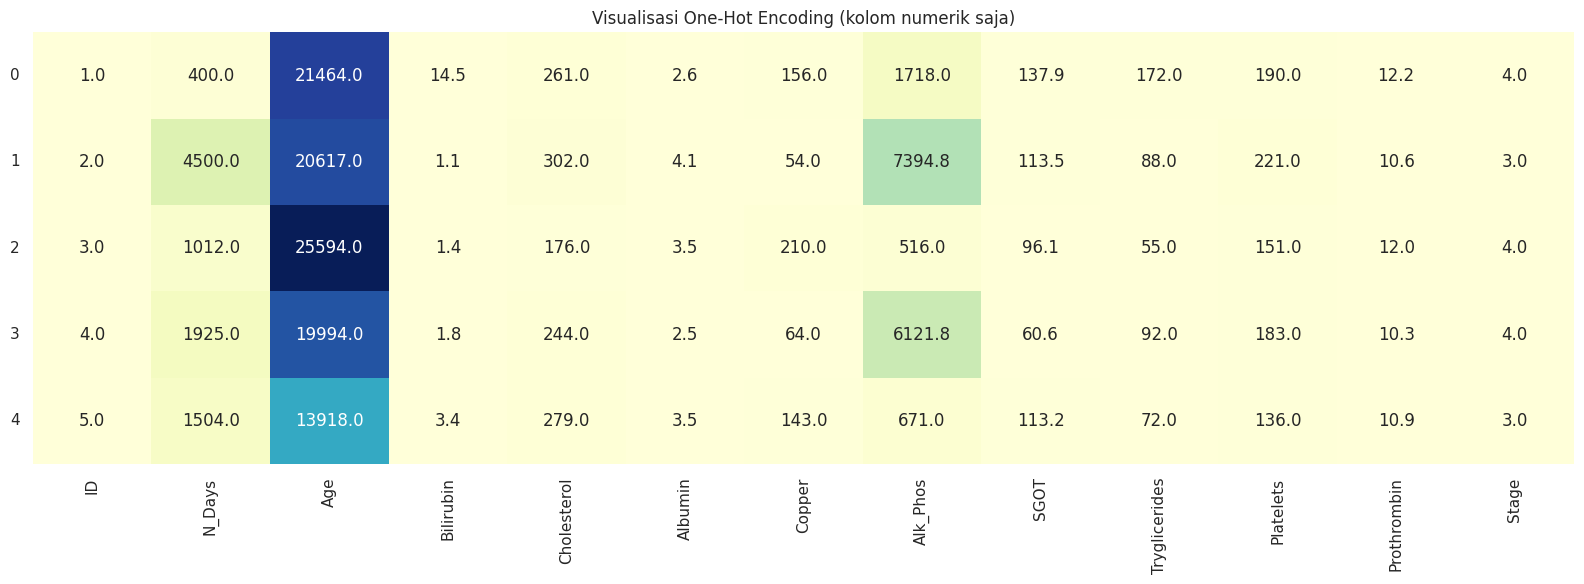

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('cirrhosis.csv')

# Tampilkan data awal
print("Data awal:")
print(df.head())

# Identifikasi kolom kategorikal
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Tampilkan hasil encode
print("\nData setelah One-Hot Encoding:")
print(df_encoded.head())

# Pilih hanya kolom numerik untuk visualisasi heatmap
numeric_cols = df_encoded.select_dtypes(include=['number'])

# Ambil 5 baris pertama dan maksimal 20 kolom untuk ditampilkan
subset = numeric_cols.iloc[:5, :20]

# Buat heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(subset, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False)
plt.title('Visualisasi One-Hot Encoding (kolom numerik saja)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Normalisasi / Standarisasi Data

Data Setelah Normalisasi (Min-Max Scaling):
         ID    N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0  0.000000  0.075515  0.622822   0.512635     0.085196  0.238806  0.260274   
1  0.002398  0.937947  0.578364   0.028881     0.109970  0.813433  0.085616   
2  0.004796  0.204249  0.839597   0.039711     0.033837  0.567164  0.352740   
3  0.007194  0.396298  0.545664   0.054152     0.074924  0.216418  0.102740   
4  0.009592  0.307741  0.226748   0.111913     0.096073  0.585821  0.238014   

   Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
0  0.105279  0.258993       0.246018   0.194234     0.355556  1.000000  
1  0.523509  0.202298       0.097345   0.241275     0.177778  0.666667  
2  0.016724  0.161871       0.038938   0.135053     0.333333  1.000000  
3  0.429723  0.079554       0.104425   0.183612     0.144444  1.000000  
4  0.028143  0.201439       0.069027   0.112291     0.211111  0.666667  

Data Setelah Standarisasi (Z-Score):
     

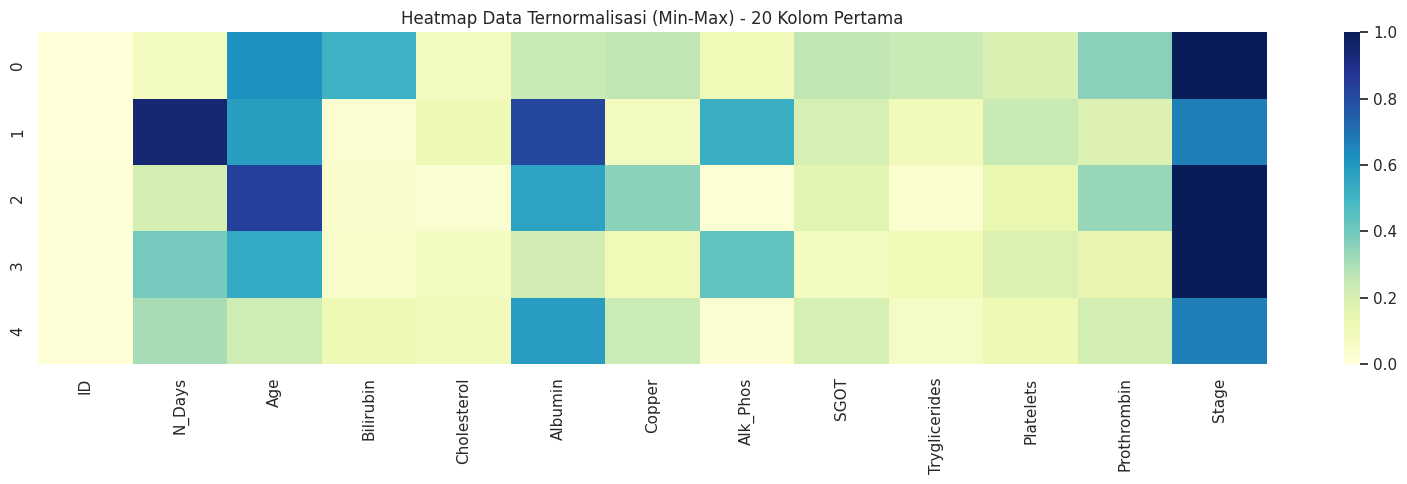

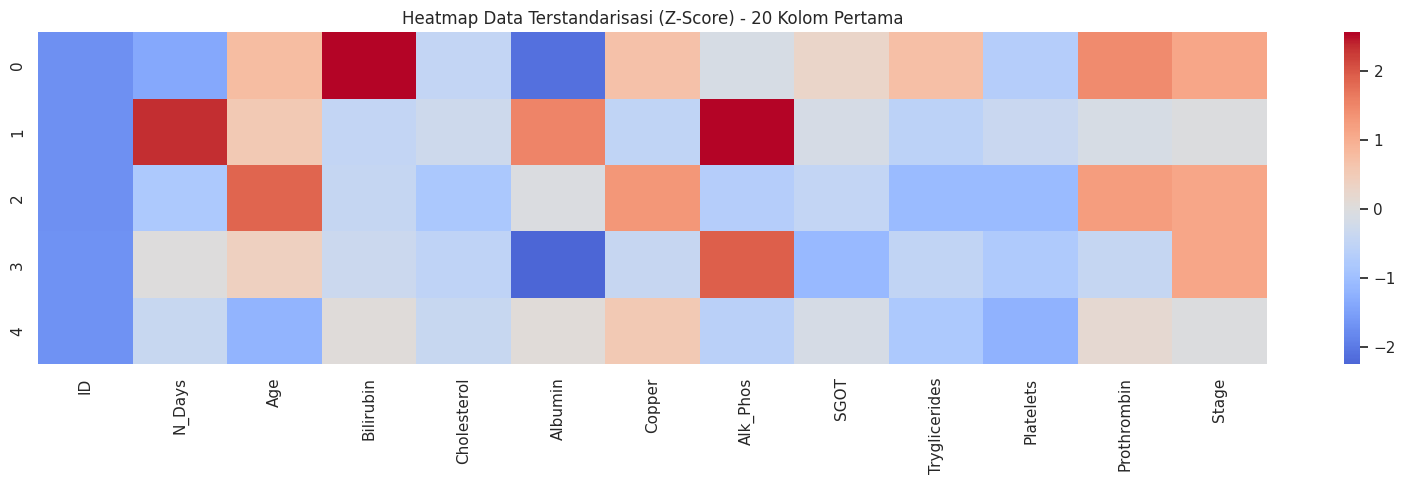

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load data
df = pd.read_csv('cirrhosis.csv')

# One-Hot Encoding
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Ambil hanya kolom numerik
df_numeric = df_encoded.select_dtypes(include=['number'])

# --- Normalisasi (Min-Max Scaling) ---
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# --- Standarisasi (Z-Score) ---
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# --- Tampilkan hasil normalisasi dan standarisasi (5 baris pertama) ---
print("Data Setelah Normalisasi (Min-Max Scaling):")
print(df_normalized.head())

print("\nData Setelah Standarisasi (Z-Score):")
print(df_standardized.head())

# --- Visualisasi (Normalisasi) ---
plt.figure(figsize=(16, 5))
sns.heatmap(df_normalized.iloc[:5, :20], annot=False, cmap="YlGnBu")
plt.title("Heatmap Data Ternormalisasi (Min-Max) - 20 Kolom Pertama")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Visualisasi (Standarisasi) ---
plt.figure(figsize=(16, 5))
sns.heatmap(df_standardized.iloc[:5, :20], annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap Data Terstandarisasi (Z-Score) - 20 Kolom Pertama")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Simpan hasil normalisasi dan standarisasi ke file CSV
df_normalized.to_csv('normalized_cirrhosis.csv', index=False)
df_standardized.to_csv('standardized_cirrhosis.csv', index=False)


## Menghapus Kolom Tidak Relevan

In [24]:
# Load data lagi dari awal (atau pakai df yang sudah dibaca sebelumnya)
df = pd.read_csv('cirrhosis.csv')

# Hapus kolom tidak relevan
columns_to_drop = ['ID', 'N_Days']
df_cleaned = df.drop(columns=columns_to_drop)

# Tampilkan hasil
print("Kolom setelah dihapus:")
print(df_cleaned.columns)

# Lihat beberapa data awal
df_cleaned.head()


Kolom setelah dihapus:
Index(['Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')


,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Split Data

       INFO SPLIT DATA        
Fitur (X)        : (418, 26)
Target (y)       : (418,)
X_train shape    : (334, 26)
X_test shape     : (84, 26)
y_train shape    : (334,)
y_test shape     : (84,)


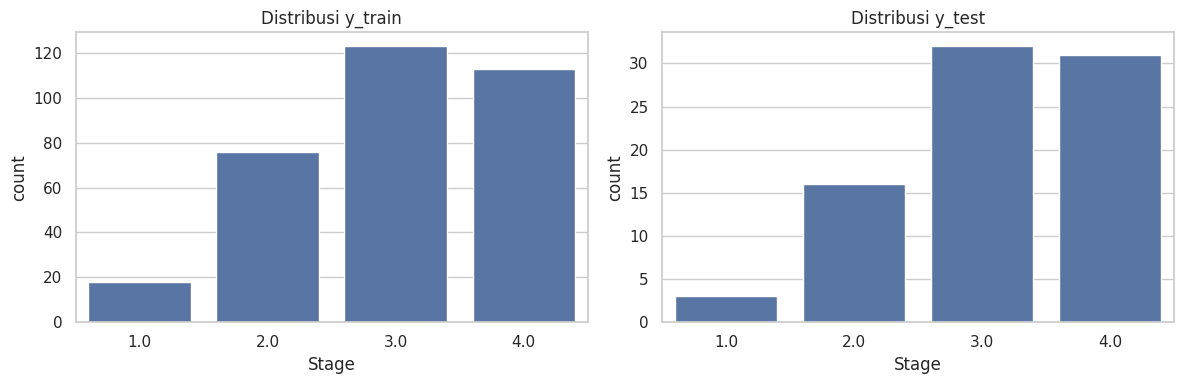

In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cirrhosis.csv')

# Hapus kolom tidak relevan
df = df.drop(columns=['ID', 'N_Days'])

# Tentukan target dan fitur
X = df.drop(columns=['Stage'])  # fitur
y = df['Stage']                 # target

# One-Hot Encoding untuk kolom kategorikal
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Tampilkan informasi bentuk dataset
print(f"{'='*30}")
print(f"{'INFO SPLIT DATA'.center(30)}")
print(f"{'='*30}")
print(f"Fitur (X)        : {X_encoded.shape}")
print(f"Target (y)       : {y.shape}")
print(f"X_train shape    : {X_train.shape}")
print(f"X_test shape     : {X_test.shape}")
print(f"y_train shape    : {y_train.shape}")
print(f"y_test shape     : {y_test.shape}")
print(f"{'='*30}")

# Optional: Visualisasi distribusi target di data train dan test
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Distribusi y_train")
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title("Distribusi y_test")
plt.tight_layout()
plt.show()


Missing values in features:
ID                  0
N_Days              0
Age                 0
Bilirubin           0
Cholesterol       134
Albumin             0
Copper            108
Alk_Phos          106
SGOT              106
Tryglicerides     136
Platelets          11
Prothrombin         2
Stage               6
Drug_Placebo        0
Sex_M               0
Ascites_Y           0
Hepatomegaly_Y      0
Spiders_Y           0
Edema_S             0
Edema_Y             0
dtype: int64

Data types of features:
ID                  int64
N_Days              int64
Age                 int64
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage             float64
Drug_Placebo         bool
Sex_M                bool
Ascites_Y            bool
Hepatomegaly_Y       bool
Spiders_Y            bool
Edema_S              bool


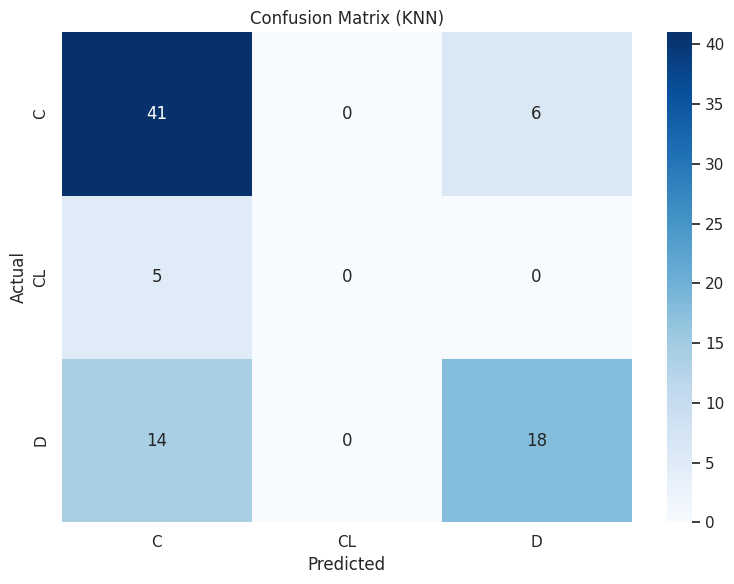


CLASSIFICATION REPORT (KNN)
              precision    recall  f1-score   support

           C       0.68      0.87      0.77        47
          CL       0.00      0.00      0.00         5
           D       0.75      0.56      0.64        32

    accuracy                           0.70        84
   macro avg       0.48      0.48      0.47        84
weighted avg       0.67      0.70      0.67        84


⚠️ Label berikut tidak pernah diprediksi: ['CL']


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('cirrhosis.csv')

# 2. Drop baris dengan NaN di kolom target
df = df.dropna(subset=['Status'])

# 3. Pisahkan fitur dan target
X = df.drop(columns='Status')
y = df['Status']

# 4. Konversi fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# 5. Periksa apakah ada nilai yang hilang di fitur
print("Missing values in features:")
print(X.isnull().sum())

# 6. Jika ada nilai yang hilang, isi dengan nilai 0 (atau gunakan metode lain)
X = X.fillna(0)

# 7. Cek tipe data fitur untuk memastikan semuanya numerik
print("\nData types of features:")
print(X.dtypes)

# 8. Bagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 9. Scaling data (standarisasi fitur)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 10. Grid Search untuk KNN
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# 11. Hasil grid search
print("="*40)
print("HASIL GRID SEARCH KNN")
print("="*40)
print("Best K:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)
print("="*40)

# 12. Gunakan model terbaik
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# 13. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nEVALUASI MODEL KNN")
print("="*40)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# 14. Confusion matrix
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 15. Classification report
print("\nCLASSIFICATION REPORT (KNN)")
print("="*40)
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

# 16. Cek label yang tidak pernah diprediksi
unpredicted_labels = [label for label, row in zip(labels, cm.T) if row.sum() == 0]
if unpredicted_labels:
    print("\n Label berikut tidak pernah diprediksi:", unpredicted_labels)
else:
    print("\n Semua label berhasil diprediksi oleh model.")
